<font size=6><b>Lec08.NLP RNN
* <b>RNN(Recurrent Neural Network) : 순환 신경망
* <b>LSTM(Long Short-Term Memory) : 장단기 기억 신경망
* <b>BiLSTM(Bidirectional LSTM) : 양방향 LSTM 신경망
* <b>GRU(Gated Recurrent Unit) : 게이트 순환 유닛 신경망

# RNN
* RNN(Recurrent Neural Network) : 순환 신경망
* 입력과 출력을 시퀀스 단위로 처리하는 시퀀스(Sequence) 모델
* 가장 기본적인 인공 신경망 시퀀스 모델

<table>
    <tr><td><img src="https://wikidocs.net/images/page/22886/rnn_image4_ver2.PNG"></td>
        <td><img width=200 src="https://wikidocs.net/images/page/22888/vanilla_rnn_ver2.PNG"></td></tr></table><br>
입력층 : $h_{t} = tanh(W_{x} x_{t} + W_{h}h_{t−1} + b)$        <br>
출력층 : $y_{t} = f(W_{y}h_{t} + b)$ <br><br>
<img src="https://wikidocs.net/images/page/22886/rnn_images4-5.PNG">

* 3D : (batch_size, timesteps, input_dim) 덩어리,행,렬
* model.add(SimpleRNN(hidden_units, input_shape=(timesteps=행수, input_dim=열수)))
* model.add(SimpleRNN(hidden_units, input_length=행수, input_dim=열수))
* return_sequences = True


# LSTM
* LSTM(Long Short-Term Memory) : 장단기 기억 신경망
* 입력 게이트,  삭제 게이트,  셀 상태,  출력 게이트
* ref : https://wikidocs.net/22888

<img width=300 src="https://wikidocs.net/images/page/22888/vaniila_rnn_and_different_lstm_ver2.PNG">
<table>
<tr>
<td>입력 게이트</td>    
<td><img width=200 src="https://wikidocs.net/images/page/22888/inputgate.PNG"></td>
<td>$i_{t}=σ(W_{xi}x_{t}+W_{hi}h_{t-1}+b_{i})$<br>
    $g_{t}=tanh(W_{xg}x_{t}+W_{hg}h_{t-1}+b_{g})$</td>    
</tr>
<tr>
<td>삭제 게이트</td>        
<td><img width=200 src="https://wikidocs.net/images/page/22888/forgetgate.PNG"></td>
<td>$f_{t}=σ(W_{xf}x_{t}+W_{hf}h_{t-1}+b_{f})$</td>
</tr>
<tr> 
<td>셀 상태</td>        
<td><img width=200 src="https://wikidocs.net/images/page/22888/cellstate2.PNG"></td>
<td>$C_{t}=f_{t}∘C_{t-1}+i_{t}∘g_{t}$</td>
</tr>    
<tr>
<td>출력 게이트와 은닉 상태</td>        
<td><img width=200 src="https://wikidocs.net/images/page/22888/outputgateandhiddenstate.PNG"></td>
<td>$o_{t}=σ(W_{xo}x_{t}+W_{ho}h_{t-1}+b_{o})$<br>
    $h_{t}=o_{t}∘tanh(c_{t})$</td>
</tr>
</table>

# BiLSTM
* BiLSTM(Bidirectional LSTM) : 양방향 LSTM 신경망
*  앞 시점의 은닉 상태(Forward States) 를 전달받아 현재의 은닉 상태를 계산
* 뒤 시점의 은닉 상태(Backward States) 를 전달 받아 현재의 은닉 상태를 계산
* 이 두 개의 값을 이용해 출력값 예측

<img src="https://wikidocs.net/images/page/22886/rnn_image5_ver2.PNG">

In [2]:
from tensorflow.keras.layers import Bidirectional, SimpleRNN
from keras.models import Sequential
# timesteps = 10
# input_dim = 5

# model = Sequential()
# model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True), input_shape=(timesteps, input_dim)))

# GRU
* GRU(Gated Recurrent Unit) : 게이트 순환 유닛 신경망
* LSTM의 간소화
* ref : https://wikidocs.net/22889

<table><tr><td>
<img width=200 src="https://wikidocs.net/images/page/22889/gru.PNG">
</td><td>
$r_{t}=σ(W_{xr}x_{t}+W_{hr}h_{t-1}+b_{r})$ <br>
$z_{t}=σ(W_{xz}x_{t}+W_{hz}h_{t-1}+b_{z}) $  <br>
$g_{t}=tanh(W_{hg}(r_{t}∘h_{t-1})+W_{xg}x_{t}+b_{g})$  <br>
    $h_{t}=(1-z_{t})∘g_{t}+z_{t}∘h_{t-1}$</td></tr></table><br>
model.add(GRU(hidden_size, input_shape=(timesteps, input_dim)))

# [실습] 뉴스 분류
* RNN을 이용한 자연어 처리
* ref : https://scikit-learn.org/stable/datasets/real_world.html#the-20-newsgroups-text-dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

## Load Data

In [3]:
from sklearn.datasets import fetch_20newsgroups
new_data = fetch_20newsgroups(subset='train'
                              , remove=('headers', 'footers', 'quotes')
                              , categories=['alt.atheism','comp.sys.mac.hardware','sci.electronics','talk.politics.guns','comp.windows.x']
                              , random_state=1234)

In [4]:
# new_data['target_names']
#---------------------------------------------
# ['alt.atheism',
#  'comp.graphics',
#  'comp.os.ms-windows.misc',
#  'comp.sys.ibm.pc.hardware',
#  'comp.sys.mac.hardware',
#  'comp.windows.x',
#  'misc.forsale',
#  'rec.autos',
#  'rec.motorcycles',
#  'rec.sport.baseball',
#  'rec.sport.hockey',
#  'sci.crypt',
#  'sci.electronics',
#  'sci.med',
#  'sci.space',
#  'soc.religion.christian',
#  'talk.politics.guns',
#  'talk.politics.mideast',
#  'talk.politics.misc',
#  'talk.religion.misc']


In [5]:
new_data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [6]:
new_data['data'][0]

"One not-so-quick question to throw out there for you guys...\n\nFor our class project, we need to design and build a power supply\nto the following specs:\n\nVoltatge:  adjustable from 1-12V\nCurrent:   *limited* at 1A\n\nVoltage must stay within 2% of designated value for I from 0-1A\nAC ripple less than 5 mV (rms)\n\nOf course, we can't just use an adjustable voltage, current-limiting\nregulator chip ;^)\n\nOur problem is with the current limiting (i.e. we've found stuff to\ndo the rest of the parts of the circuit).  What the supply must do,\nif presented with a load which would draw more than 1A, given the\nsupply voltage, is reduce the voltage so that the current will equal\none amp.  Thus, if we were to short the thing with the ammeter, we\nshould read one amp.  If we measure the current through a 1 ohm \nresistor at 12V, we should read one amp (and the output voltage, by\nnecessity, must be 1V.\n\nThe only basic idea we have seen for the current limiter involves\na circuit which

In [7]:
new_data['target'][0]

3

In [8]:
df = pd.DataFrame(new_data['data'], columns=["news"])
df['target'] = new_data['target']
df.tail(2)

,news,target
2786,"\n\nEvery time somone writes something and says it is merely describing the norm,\nit is infact re-inforcing that norm upon those programmed not to think for\nthemselves. The motto is dangerous in itself, it tells the world that every\n*true* American is god-fearing, and puts down those who do not fear gods. It\ndoesn't need anyone to make it dangerous, it does a good job itself by just\nexisting on your currency.\n\n\nThe Desert Brat",0
2787,"I was shocked to see that the subject of my last rely to awesley was\n""Luser!"" That was certainly not my intention. I meant to leave the\nsubject line unchanged. I believe that the NNTP server I use at columbia\nmust have put in that subject line in protest over problems with my header.\n That was rather rude of them, but beggars can't be choosers, I suppose.\n\nIn any case, I didn't do it and I apologize to awesley for the apparent\ninsult.",4


In [9]:
print(df.shape)
df.info()

(2788, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2788 entries, 0 to 2787
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   news    2788 non-null   object
 1   target  2788 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 43.7+ KB


## 워드 임베딩
* 글자 워드를 숫자로 변경한 벡터 [4 5 9 15]
    * 희소행렬() : 원핫인코딩(0 1 000000....00 ) voca_size
    * 밀집행렬() : (0,2)  1
                : dim(차수) : 다차원 --> 차수로 줄여서 단어집을 표현
                
<pre>
 희소행렬              밀집행렬
-----------------    -----------------
원핫인코딩            차수로 차원 축소
0 1 의값             분산최대화 투영 행렬내적 : float값
벡터의크기=voca_size  dim(차수) 크기의 voca_size

* dict 슬라이싱

In [10]:
# #----------- dict 슬라이싱 -------------
# # print(token.word_index)
word_index_dict = {'deleted': 32653, 'for': 41127, 'very': 94140, 'good': 43961, 'reason': 76509}
import itertools 
res = dict(itertools.islice(word_index_dict.items(), 2))
print(res)
res = dict( list(word_index_dict.items())[:2] )
print(res)

{'deleted': 32653, 'for': 41127}
{'deleted': 32653, 'for': 41127}


### Tokenizer() by 규환

In [11]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

print(f"df 전체 row수 : {len(df['news'])}")
token = Tokenizer()
token.fit_on_texts(df['news'])
voca = token.word_index
print(f"voca size(모든기사글에 중복없이 사용된 단어 갯수) : {len(voca)}")

encoded = token.texts_to_sequences(df['news'])
len_ = max((len(e) for e in encoded))
print(f"임베딩 최대 길이(가장긴글에서 사용된 단어 갯수) : {len_}")

max(len(sent) for sent in encoded)

encoded_p = pad_sequences(encoded, padding='pre', maxlen=len_)
print(f"패딩 후 shape : {np.array(encoded_p).shape}")  

X_train, X_test, y_train, y_test = train_test_split(encoded_p, df['target'], test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

df 전체 row수 : 2788
voca size(모든기사글에 중복없이 사용된 단어 갯수) : 32497
임베딩 최대 길이(가장긴글에서 사용된 단어 갯수) : 11919
패딩 후 shape : (2788, 11919)
(2230, 11919) (558, 11919) (2230,) (558,)


### CountVectorizer()

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

print(f"df 전체 row수 : {len(df['news'])}")

vector = CountVectorizer(stop_words="english")
encoded_arr = vector.fit_transform(df['news']).toarray()
#row갯수==df의 row수 , col갯수==vocab(전체단어수)
print(encoded_arr.shape)    # DTM(레코드수,사전크기)

vocab = vector.vocabulary_
print(f"voca size(모든기사글에 중복없이 사용된 단어 갯수) : {len(voca)}")

res = dict( list(vocab.items())[:5] )
print(len(vocab), res)

max_length = max(len(sent) for sent in encoded_arr )
print(f"임베딩 최대 길이(가장긴글에서 사용된 단어 갯수) : {max_length}")

df 전체 row수 : 2788
(2788, 31533)
voca size(모든기사글에 중복없이 사용된 단어 갯수) : 32497
31533 {'quick': 22754, 'question': 22743, 'throw': 27522, 'guys': 13706, 'class': 7536}
임베딩 최대 길이(가장긴글에서 사용된 단어 갯수) : 31533


## Train Test 분리

In [13]:
split_size = int( len(encoded_arr) * 0.8)
print( split_size )


X = encoded_arr
y = df['target']
X_train = X[ :split_size]
X_test =  X[split_size: ]
y_train = y[ :split_size]
y_test =  y[split_size: ]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train[0], y_train[0])

2230
(2230, 31533) (2230,) (558, 31533) (558,)
[0 0 0 ... 0 0 0] 3


* map(function, iterable)
* list(map(int, [1.1, 2.2, 3.3, 4.4, 5.5]))

In [14]:
list(map(len, [[1,2], [3,4,5]]))

[2, 3]

## 최대 길이

In [22]:
encoded_arr.shape

(2788, 31533)

In [25]:
max_length = max(len(sent) for sent in encoded_arr)
print(f'{max_length}')

31533


## 모델 학습

In [26]:
df['target'].value_counts()

2    593
3    591
1    578
4    546
0    480
Name: target, dtype: int64

<Axes: >

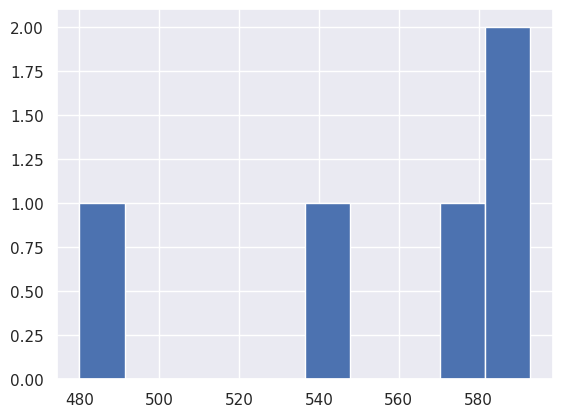

In [28]:
df['target'].value_counts().T.hist()

In [29]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 1)
model.fit(X_train, y_train)
pre_test = model.predict(X_test)
score = accuracy_score(y_test,pre_test)
print(score)

0.8315412186379928


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
from nltk.corpus import stopwords

print(f"df 전체 row수 : {len(df['news'])}")

vector = TfidfVectorizer(stop_words="english")
encoded_arr = vector.fit_transform(df['news']).toarray()
print(encoded_arr.shape)    # DTM(레코드수,사전크기)

vocab = vector.vocabulary_
print(f"voca size(모든기사글에 중복없이 사용된 단어 갯수) : {len(voca)}")

res = dict( list(vocab.items())[:5] )
print(len(vocab), res)

max_length = max(len(sent) for sent in encoded_arr )
print(f"임베딩 최대 길이(가장긴글에서 사용된 단어 갯수) : {max_length}")

df 전체 row수 : 2788
(2788, 31533)
voca size(모든기사글에 중복없이 사용된 단어 갯수) : 32497
31533 {'quick': 22754, 'question': 22743, 'throw': 27522, 'guys': 13706, 'class': 7536}
임베딩 최대 길이(가장긴글에서 사용된 단어 갯수) : 31533


In [32]:
split_size = int( len(encoded_arr) * 0.8)
print( split_size )


X = encoded_arr
y = df['target']
X_train = X[ :split_size]
X_test =  X[split_size: ]
y_train = y[ :split_size]
y_test =  y[split_size: ]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train[0], y_train[0])

2230
(2230, 31533) (2230,) (558, 31533) (558,)
[0. 0. 0. ... 0. 0. 0.] 3


In [34]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 1234)
model.fit(X_train, y_train)
pre_test = model.predict(X_test)
score = accuracy_score(y_test,pre_test)
print(score)

0.8261648745519713
